In [1]:
# Parameters
annotations_to_plot = []
FILE = "CNAG_10x_RNA.SC__SCANPY__DIM_REDUCTION_UMAP.h5ad"
WORKFLOW_MANIFEST = "{\"doi\":null,\"nextflowVersion\":\"!>=20.10.0\",\"defaultBranch\":\"master\",\"version\":\"0.25.0\",\"homePage\":\"https://github.com/vib-singlecell-nf/vsn-pipelines\",\"gitmodules\":null,\"description\":\"A repository of pipelines for single-cell data in Nextflow DSL2\",\"recurseSubmodules\":false,\"name\":\"vib-singlecell-nf/vsn-pipelines\",\"mainScript\":\"main.nf\",\"author\":null}"
WORKFLOW_PARAMETERS = "{\"global\":{\"project_name\":\"CNAG_10x_RNA\",\"outdir\":\"out\",\"species\":\"human\",\"seed\":250,\"genome\":{\"assembly\":\"hg38\"}},\"misc\":{\"test\":{\"enabled\":false},\"manifestAsJSON\":\"{\\\"doi\\\":null,\\\"nextflowVersion\\\":\\\"!>=20.10.0\\\",\\\"defaultBranch\\\":\\\"master\\\",\\\"version\\\":\\\"0.25.0\\\",\\\"homePage\\\":\\\"https://github.com/vib-singlecell-nf/vsn-pipelines\\\",\\\"gitmodules\\\":null,\\\"description\\\":\\\"A repository of pipelines for single-cell data in Nextflow DSL2\\\",\\\"recurseSubmodules\\\":false,\\\"name\\\":\\\"vib-singlecell-nf/vsn-pipelines\\\",\\\"mainScript\\\":\\\"main.nf\\\",\\\"author\\\":null}\"},\"utils\":{\"container\":\"vibsinglecellnf/utils:0.4.0\",\"publish\":{\"compressionLevel\":6,\"annotateWithBatchVariableName\":false,\"mode\":\"copy\"}},\"sc\":{\"file_converter\":{\"off\":\"h5ad\",\"tagCellWithSampleId\":true,\"remove10xGEMWell\":false,\"useFilteredMatrix\":true,\"makeVarIndexUnique\":false},\"file_concatenator\":{\"join\":\"outer\",\"off\":\"h5ad\"},\"scanpy\":{\"container\":\"vibsinglecellnf/scanpy:0.5.2\",\"report\":{\"annotations_to_plot\":[]},\"feature_selection\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_select_variable_genes_report.ipynb\",\"method\":\"mean_disp_plot\",\"minMean\":0.0125,\"maxMean\":3,\"minDisp\":0.5,\"off\":\"h5ad\"},\"feature_scaling\":{\"method\":\"zscore_scale\",\"maxSD\":10,\"off\":\"h5ad\"},\"neighborhood_graph\":{\"off\":\"h5ad\"},\"dim_reduction\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_dim_reduction_report.ipynb\",\"pca\":{\"method\":\"pca\",\"off\":\"h5ad\"},\"umap\":{\"method\":\"umap\",\"off\":\"h5ad\"},\"tsne\":{\"method\":\"tsne\",\"off\":\"h5ad\"}},\"clustering\":{\"preflight_checks\":true,\"report_ipynb\":\"/src/scanpy/bin/reports/sc_clustering_report.ipynb\",\"method\":\"leiden\",\"resolutions\":[0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0],\"off\":\"h5ad\"},\"marker_genes\":{\"method\":\"wilcoxon\",\"ngenes\":0,\"groupby\":\"louvain\",\"off\":\"h5ad\"},\"filter\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_filter_qc_report.ipynb\",\"cellFilterStrategy\":\"fixedthresholds\",\"cellFilterMinNCounts\":2000,\"cellFilterMinNGenes\":200,\"cellFilterMaxNGenes\":{\"PBMCmix_1\":5500,\"PBMCmix_2\":5000,\"PBMCmix_3\":3500},\"cellFilterMaxPercentMito\":{\"PBMCmix_1\":0.20,\"PBMCmix_2\":0.18,\"PBMCmix_3\":0.20},\"geneFilterMinNCells\":3,\"off\":\"h5ad\",\"outdir\":\"out\"},\"data_transformation\":{\"method\":\"log1p\",\"off\":\"h5ad\"},\"normalization\":{\"method\":\"cpx\",\"countsPerCellAfter\":10000,\"off\":\"h5ad\"}},\"harmony\":{\"container\":\"vibsinglecellnf/harmony:1.0-1\",\"report_ipynb\":\"/src/harmony/bin/reports/sc_harmony_report.ipynb\",\"varsUse\":[\"batch\"]},\"scope\":{\"genome\":\"\",\"tree\":{\"level_1\":\"scATAC-seq_Benchmark\",\"level_2\":\"RNA\",\"level_3\":\"\"}},\"cell_annotate\":{\"off\":\"h5ad\",\"method\":\"aio\",\"cellMetaDataFilePath\":\"/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/scRNA/cell_type_classification/seruat/CNAG_RNA_cell_type_seurat.txt\",\"sampleSuffixWithExtension\":\"\",\"indexColumnName\":\"composite_sample_id\",\"sampleColumnName\":\"sample_id\",\"annotationColumnNames\":[\"cell_type\",\"cell_type_pred_score\",\"cell_type_hiconf_70\"]}},\"data\":{\"tenx\":{\"cellranger_mex\":\"/staging/leuven/stg_00002/lcb/lcb_projects/BAP/data_unsorted/scRNA/SCGRES_13/cellranger/*/outs\"}},\"pcacv\":{\"container\":\"vibsinglecellnf/pcacv:0.2.0\",\"find_optimal_npcs\":{\"accessor\":\"@assays$RNA@scale.data\"}}}"


# Single-Cell Report: Dimensionality reduction

In [2]:
# Import packages
import scanpy as sc

#### Plotting settings and functions

In [3]:
# plot settings
sc.set_figure_params(dpi=150, fontsize=10, dpi_save=600)

#### Read Data

In [4]:
adata = sc.read_h5ad(filename=FILE)

In [5]:
# select features to show in the plots below
features = ['n_genes','n_counts','percent_mito'] #,'louvain']
# keep only features that are present in the data:
available_features = [ x for x in features if x in adata.obs.columns ]

---
## Dimensionality reductions

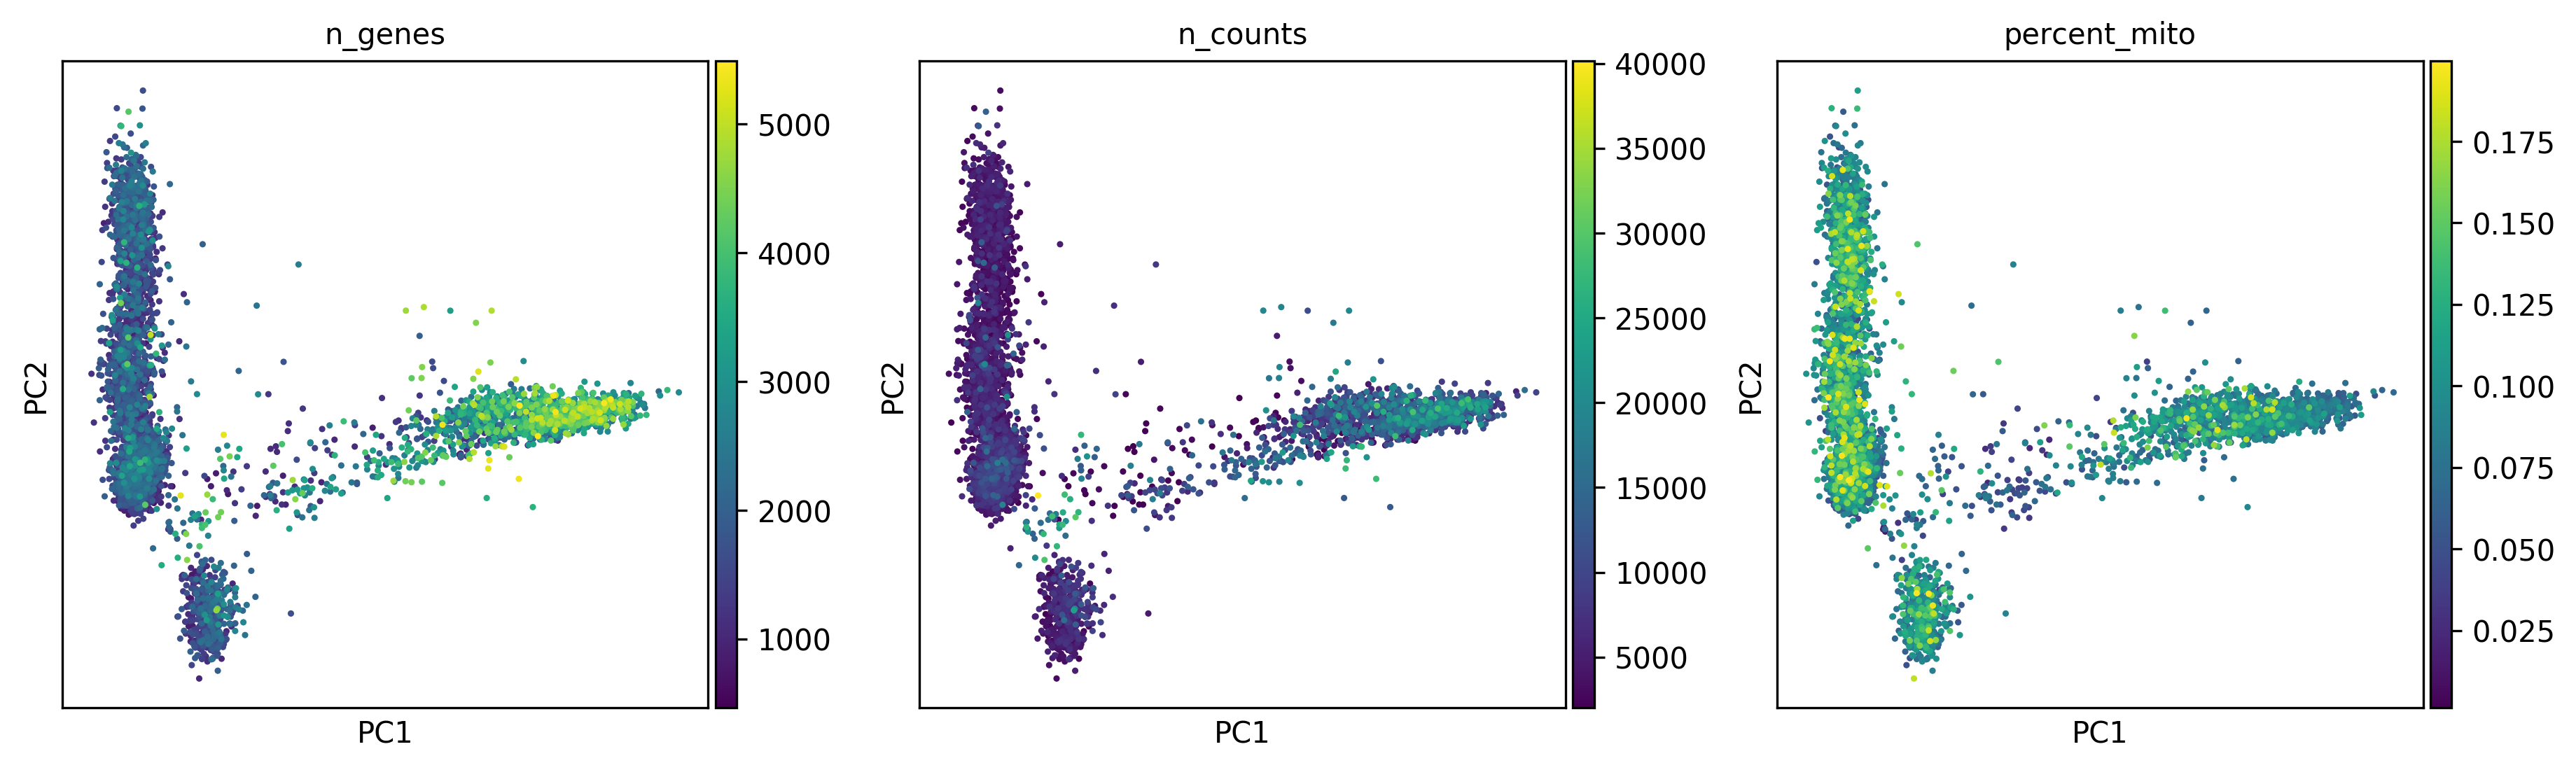

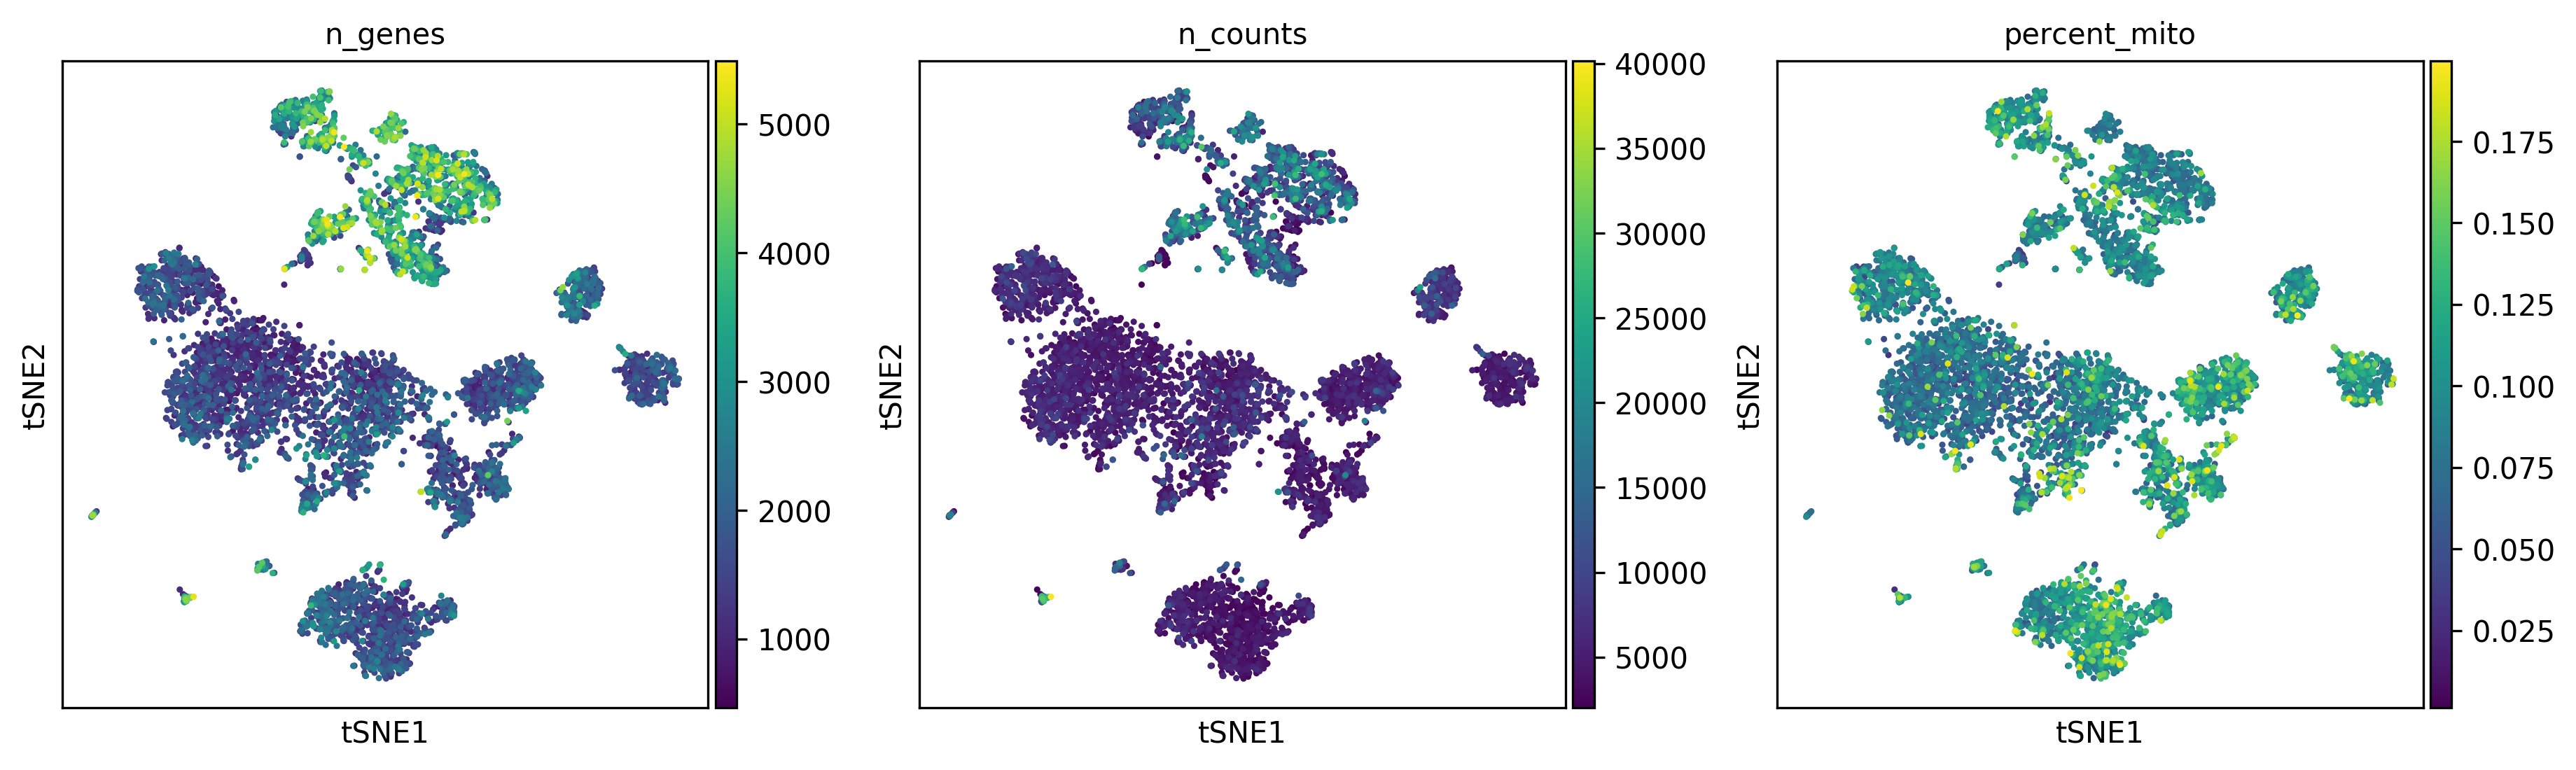

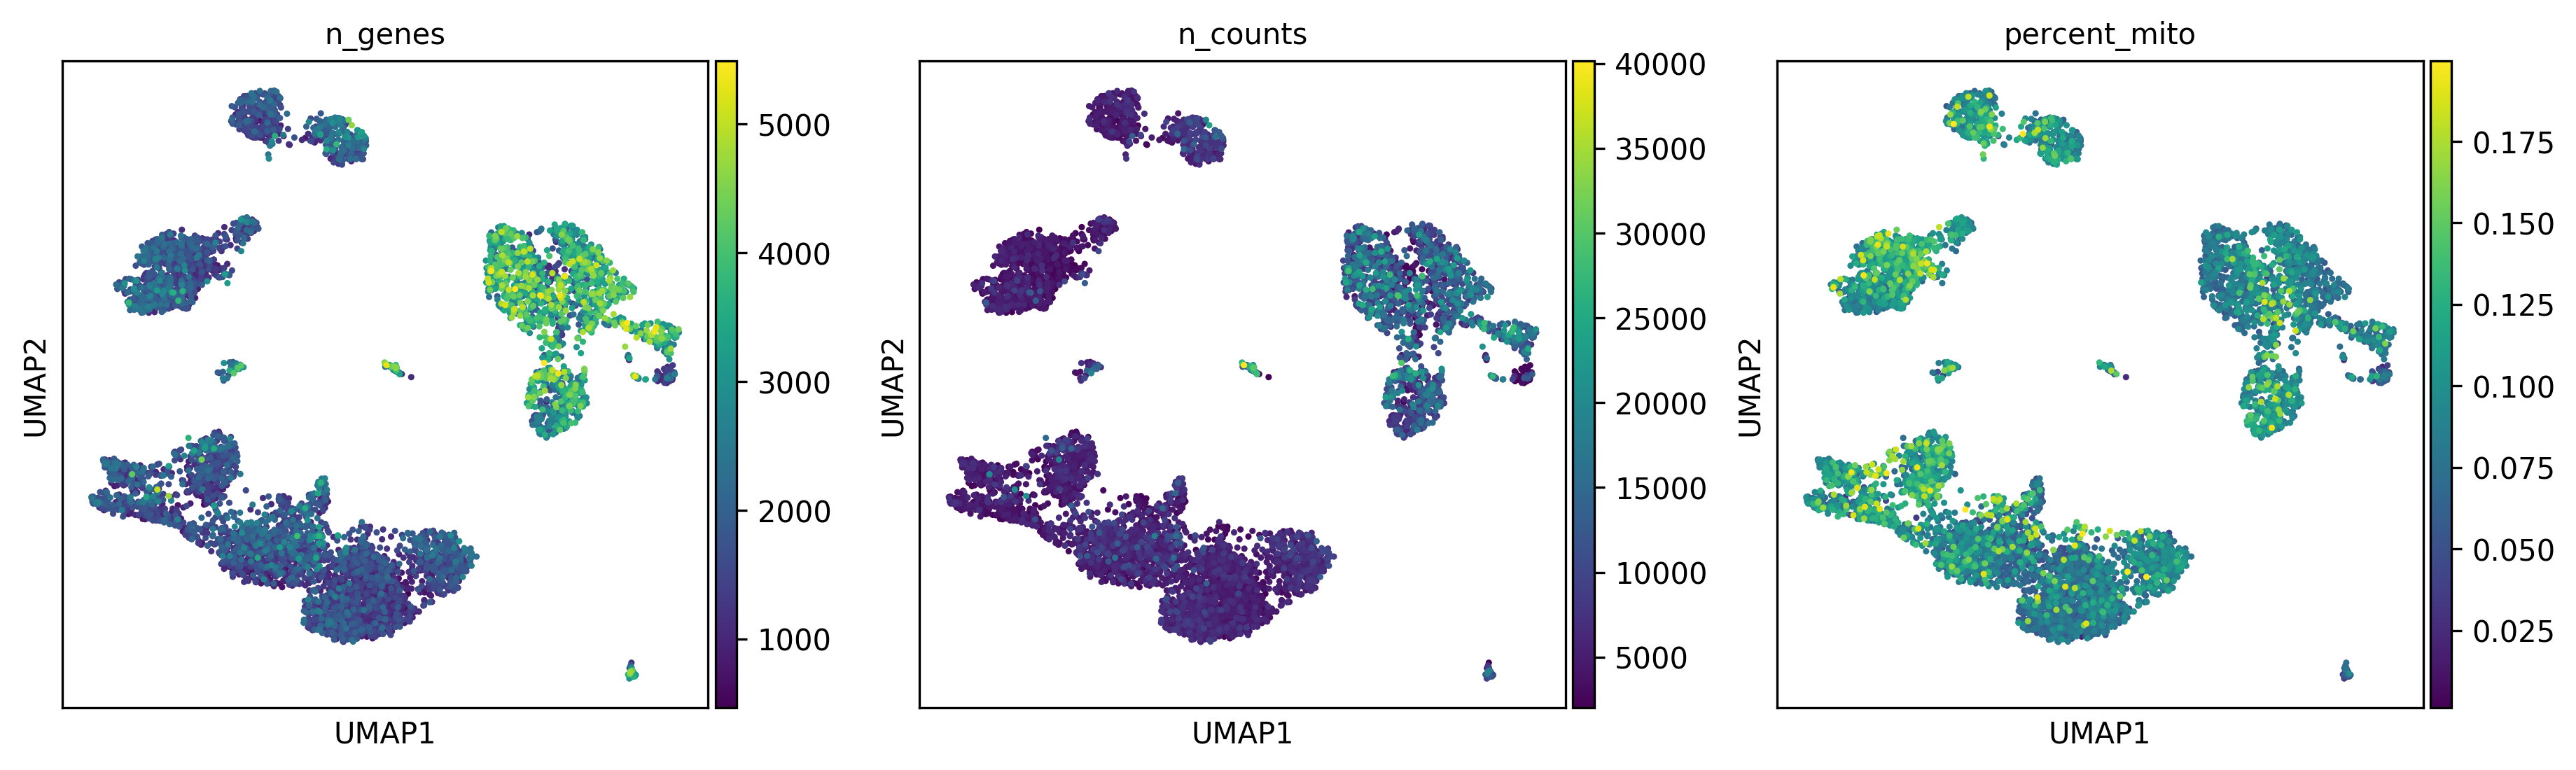

In [6]:
if len(available_features) > 0:
    if 'X_pca' in adata.obsm:
        sc.pl.pca_scatter(adata, color=available_features)
    if 'X_tsne' in adata.obsm:
        sc.pl.tsne(adata, color=available_features)
    if 'X_umap' in adata.obsm:
        sc.pl.umap(adata, color=available_features)
else:
    print(f"None of the following metrics {', '.join(features)} are found in the AnnData.")
    print("These metrics are calculated in the Scanpy filtering step.")
    print("Therefore it's very likely that this step was skipped by the workflow (see Nextflow config file).")

In [7]:
### Future additions (not yet present in adata)
#sc.pl.diffmap(adata, color=features, components=['1,2','1,3'])
#sc.pl.draw_graph(adata, color=features)